In [38]:
import os
import easyocr
from PIL import Image
import cv2
import numpy as np

In [2]:
# pip install easyocr

In [3]:
# Loading all img file allowing only of format 'jpeg' or 'png'

image_file_name_list = os.listdir('PPI containing Images')
image_file_name_list = [item for item in image_file_name_list if item.endswith('jpeg') or item.endswith('png')]
image_file_name_list

['cheq_img-2.png',
 'Sample_cheque.jpeg',
 'low pixel Bill image.png',
 'Emirates Flight images.png',
 'sample cash reciept.jpeg']

In [4]:
# creating img_path 
image_file_path_list = [os.path.join('PPI containing Images',item) for item in image_file_name_list]
image_file_path_list

['PPI containing Images/cheq_img-2.png',
 'PPI containing Images/Sample_cheque.jpeg',
 'PPI containing Images/low pixel Bill image.png',
 'PPI containing Images/Emirates Flight images.png',
 'PPI containing Images/sample cash reciept.jpeg']

In [5]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''
    
    reader = easyocr.Reader(['en'])        # For English - 'en'  And,  For Hindi - 'hi'
    return reader.readtext(img_path)

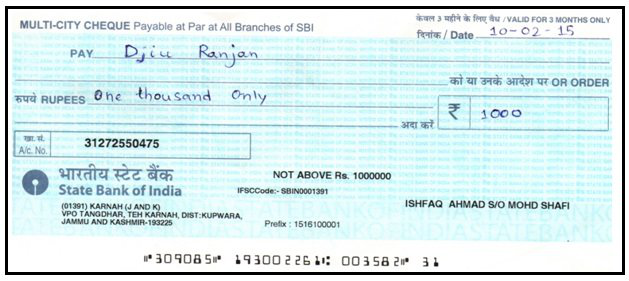

In [62]:
img = Image.open('PPI containing Images/cheq_img-2.png')
img

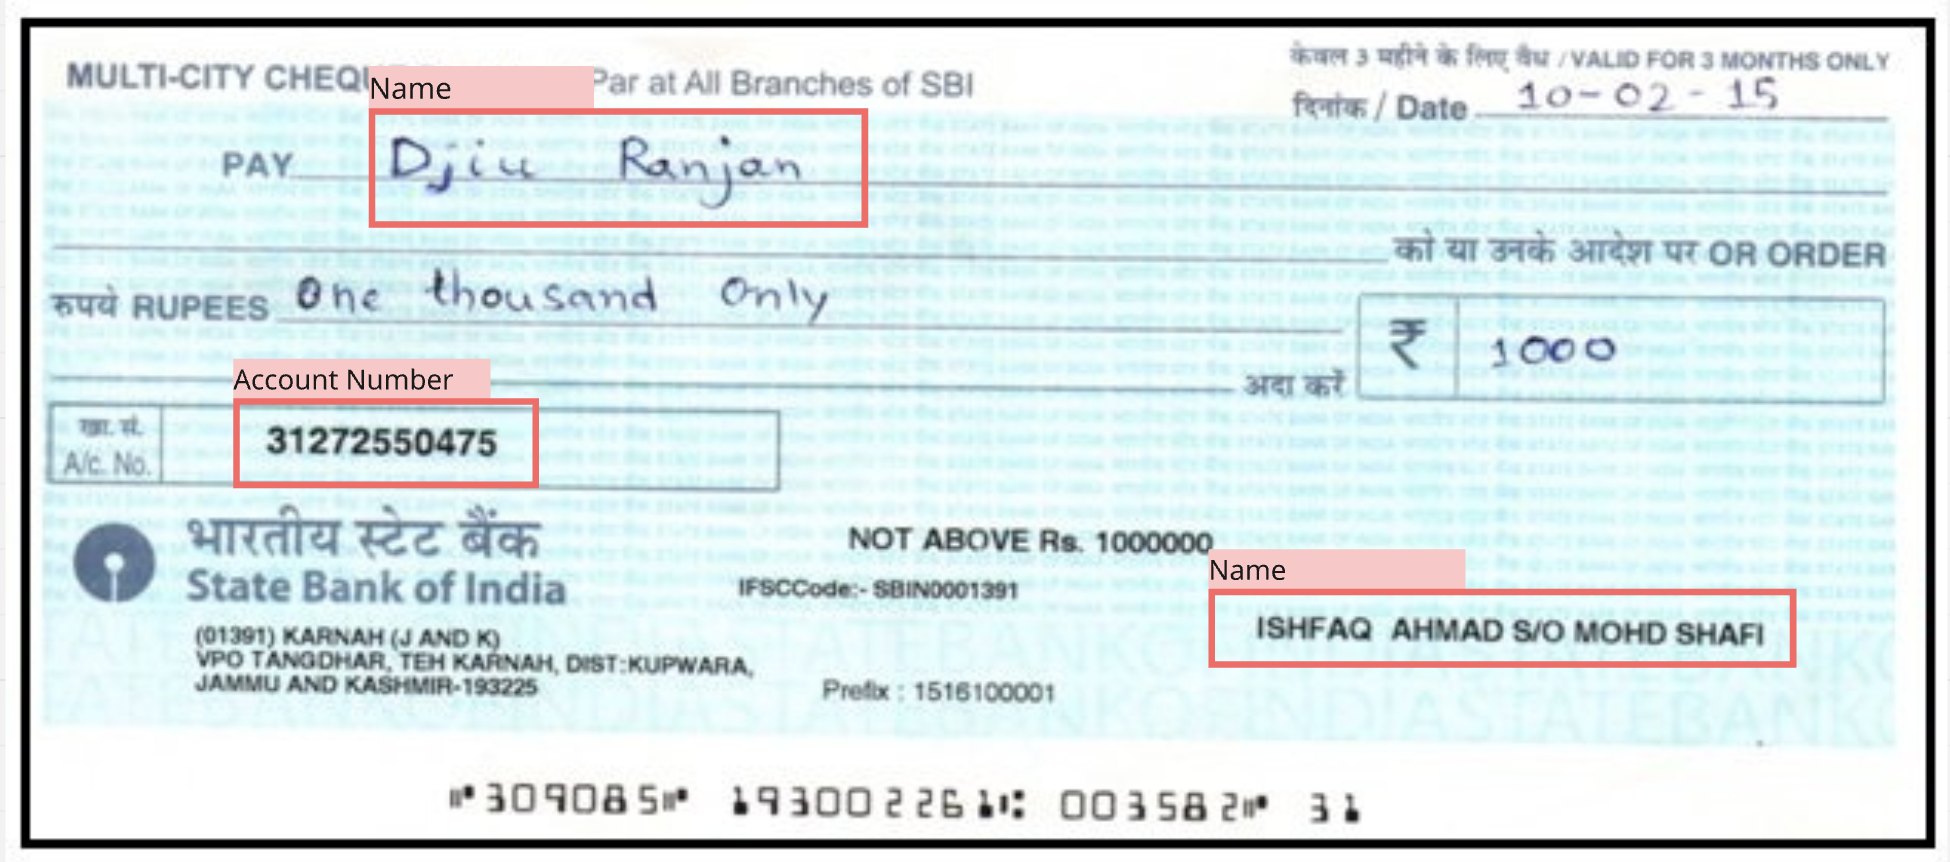

In [57]:
# Loading the labelled sampled cheque from Tool 

ann_img = Image.open('PPI containing Images/Labelled Sample_cheque.png')
ann_img

In [31]:
# Along with the label data bbox information and class information is provided during annotation

annotation_list = [{'annotation_id':1,
                    'label_name':'Name',
                   'bbox':[363, 106, 499, 120]},
                   {'annotation_id':2,
                    'label_name':'Name',
                   'bbox':[1203, 587, 587, 79]},
                   {'annotation_id':3,
                    'label_name':'Account Number',
                   'bbox':[227, 396, 306, 90]}]

print(annotation_list)

[{'annotation_id': 1, 'label_name': 'Name', 'bbox': [363, 106, 499, 120]}, {'annotation_id': 2, 'label_name': 'Name', 'bbox': [1203, 587, 587, 79]}, {'annotation_id': 3, 'label_name': 'Account Number', 'bbox': [227, 396, 306, 90]}]


In [95]:
# Using the annotation value we need to extract the text values of the bbox

# loading the annotation_item 
for ann_item in annotation_list:

    # ann_item = annotation_list[0]
    
    # fetching all details stored for the a
    label_name = ann_item['label_name']
    bbox_value = ann_item['bbox']
    x,y,width,height = bbox_value
    
    # converting the bbox from coco_bbox_format(xmin,ymin,width,height) to (xmin,ymin,xmax,ymax)
    bbox_modified_value = [x,y,x+width,y+height]
    x1,y1,x2,y2 = bbox_modified_value
    
    
    #load the image into array and then cropped the region under the bbox 
    img_array = np.array(ann_img)
    cropped_img_array = img_array[y1:y2,x1:x2]
    cropped_img = Image.fromarray(cropped_img_array)

    cropped_img.show()
    
    if os.path.exists('Sample_Image_test'):
        pass
    else:
        os.makedirs('Sample_Image_test')
    
    img_file_save_path = f'Sample_Image_test/cropped_img.png'
    cropped_img.save(img_file_save_path)
    
    # Data read 
    image_data = recognize_text(img_file_save_path)
    
    #getting all the text value extracted
    img_text_val = [item[1] for item in image_data]
    
    #joining the text value
    img_text_val = ' '.join(img_text_val)
    print(img_text_val)

/opt/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Djiy Ranjen


/opt/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


ISHFAQ AHMAD S/0 Mohd ShaFi
31272550475


/opt/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [85]:
img_array[0,0,0]

242

In [71]:
bbox_modified_value

[363, 106, 862, 226]

In [52]:
from PIL import ImageDraw

In [68]:
draw = ImageDraw.Draw(ann_img)

In [69]:
draw.rectangle(bbox_modified_value,outline='blue')

In [78]:
pil_image = Image.fromarray(img_array)

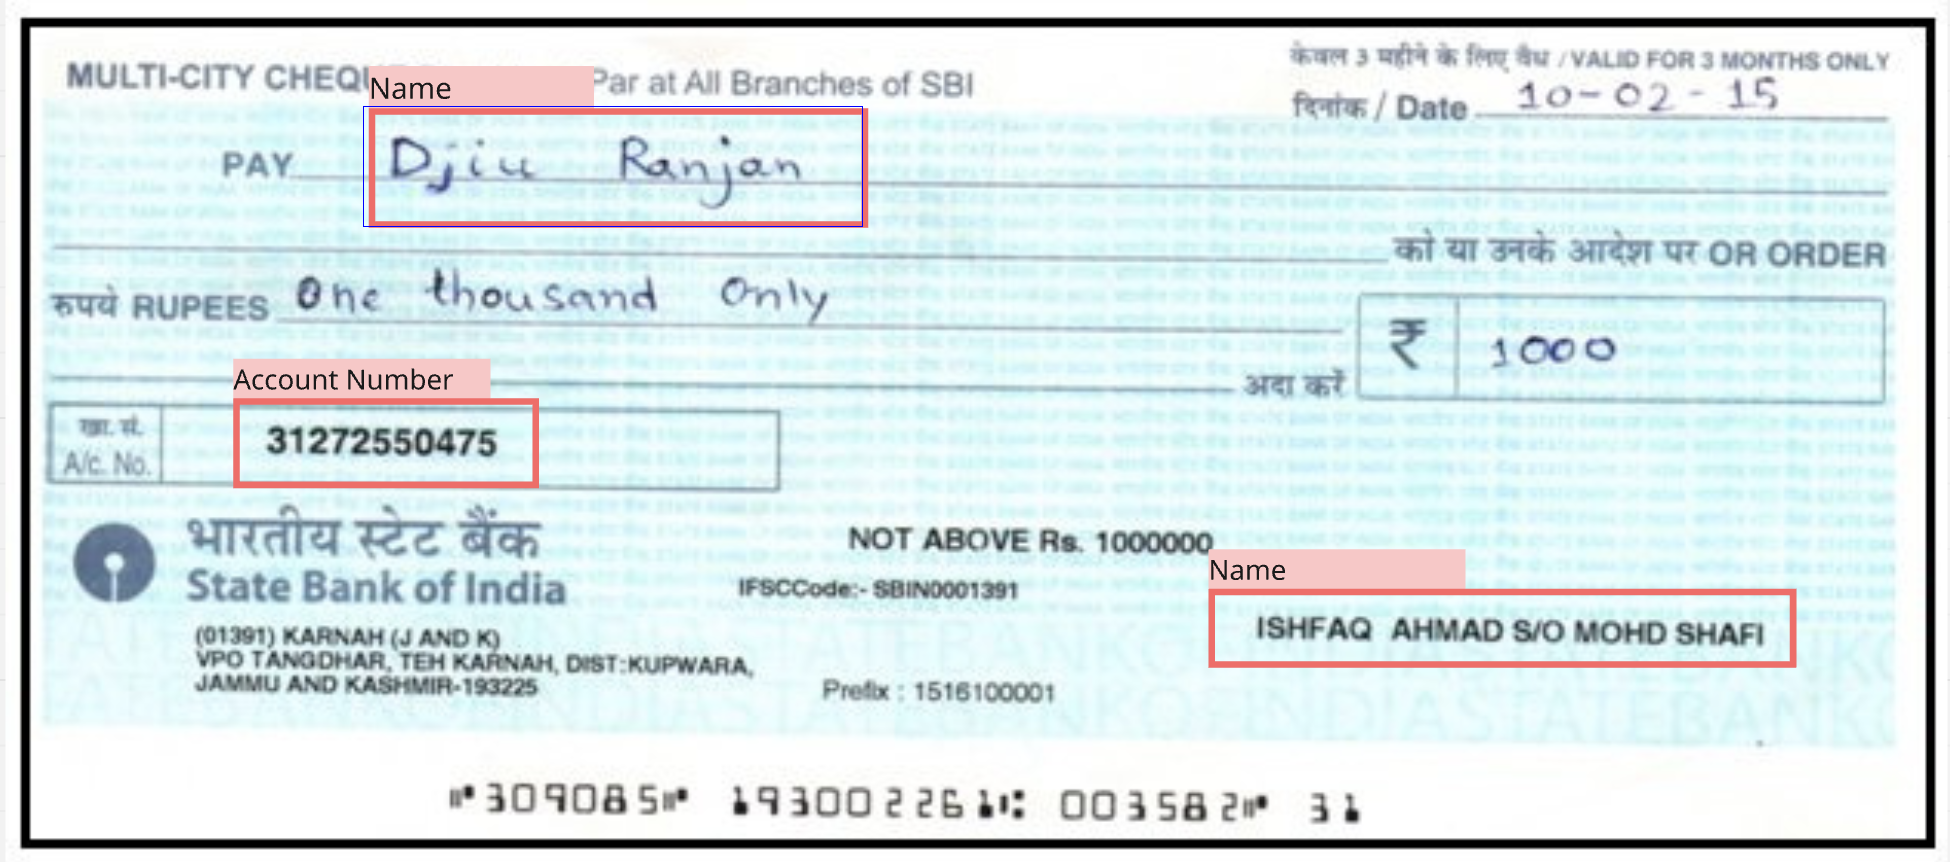

In [79]:
pil_image